In [1]:

import easyocr
reader = easyocr.Reader(['en']) # this needs to run only once to load the model into memory
result = reader.readtext('data/Tobacco/Letter/00000831.jpg')



/home/youngwook/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [2]:

from PIL import Image
from imagefolder import get_folders, get_images
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
folder_names = get_folders('data/Tobacco')

In [4]:
folder_names = folder_names[1:]

In [5]:
folder_names

['data/Tobacco/ADVE',
 'data/Tobacco/Memo',
 'data/Tobacco/Report',
 'data/Tobacco/Email',
 'data/Tobacco/Note',
 'data/Tobacco/Form',
 'data/Tobacco/Scientific',
 'data/Tobacco/News',
 'data/Tobacco/Letter',
 'data/Tobacco/Resume']

In [6]:
class_names = {}

for index, i in enumerate(folder_names):
    class_name = i.split('/')[-1]
    class_names.update({class_name:index})


In [7]:
class_names[['ADVE', 'Memo']]

TypeError: unhashable type: 'list'

In [11]:
import numpy as np

In [12]:
file_names = get_images('data/Tobacco')


In [13]:
np.asarray(file_names[0])[[1, 2, 3]]

IndexError: index 1 is out of bounds for axis 0 with size 0

In [14]:
len(file_names)

11

In [15]:
file_names = file_names[1:]

In [16]:
seeds = 666

train_list = []
valid_list = []
test_list = []

for dirs in file_names:
    #print(len(dirs))
    
    temp_ind_array = np.arange(len(dirs))
    X_train, X_test, _, _ = train_test_split(temp_ind_array, temp_ind_array, test_size=0.3, random_state=seeds)
    X_valid, X_test, _, _ = train_test_split(X_test, X_test, test_size=0.5, random_state=seeds)
    
    #print(len(X_train))
    #print(len(X_valid))
    #print(len(X_test))
    
    temp_file_arrays = np.asarray(dirs)
    
    train_list.append(temp_file_arrays[[X_train]])
    valid_list.append(temp_file_arrays[[X_valid]])
    test_list.append(temp_file_arrays[[X_test]])
    

/tmp/ipykernel_9895/1920479431.py:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_list.append(temp_file_arrays[[X_train]])
/tmp/ipykernel_9895/1920479431.py:21: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_list.append(temp_file_arrays[[X_valid]])
/tmp/ipykernel_9895/1920479431.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an e

In [17]:
t = []
for i in train_list:
    for j in i:
        t.append(j)

print(len(t))

2433


In [18]:
t

['data/Tobacco/ADVE/2058501023.jpg',
 'data/Tobacco/ADVE/502596443.jpg',
 'data/Tobacco/ADVE/2067540350_2067540352.jpg',
 'data/Tobacco/ADVE/0030048095.jpg',
 'data/Tobacco/ADVE/507806606.jpg',
 'data/Tobacco/ADVE/502472358.jpg',
 'data/Tobacco/ADVE/502592126.jpg',
 'data/Tobacco/ADVE/2084396927.jpg',
 'data/Tobacco/ADVE/tob06517.41_tob06517.42.jpg',
 'data/Tobacco/ADVE/2071466317_6318.jpg',
 'data/Tobacco/ADVE/2063550295.jpg',
 'data/Tobacco/ADVE/12779971.jpg',
 'data/Tobacco/ADVE/503524860_503524863.jpg',
 'data/Tobacco/ADVE/2058501637.jpg',
 'data/Tobacco/ADVE/91656417.jpg',
 'data/Tobacco/ADVE/2084427165_7166.jpg',
 'data/Tobacco/ADVE/0000435350.jpg',
 'data/Tobacco/ADVE/87064857.jpg',
 'data/Tobacco/ADVE/664383.jpg',
 'data/Tobacco/ADVE/502613661a-3662.jpg',
 'data/Tobacco/ADVE/99342431_2432.jpg',
 'data/Tobacco/ADVE/tob19002.28_tob19002.30.jpg',
 'data/Tobacco/ADVE/2084396137_6138.jpg',
 'data/Tobacco/ADVE/03722789.jpg',
 'data/Tobacco/ADVE/1002760819.jpg',
 'data/Tobacco/ADVE/20

In [19]:
import re

txt_file = t[0]

temp_name = txt_file.split('.')[0] + '.txt'

content = []

with open(temp_name) as f:
    line = f.readline()
    while line:
        line = f.readline()
        print(line)
        
        split_line = line.split(' ')
        
        for i in split_line:
            content.append(re.sub(r'\W+', '', i).lower())

print(content)
    
    
    

FileNotFoundError: [Errno 2] No such file or directory: 'data/Tobacco/ADVE/2058501023.txt'

In [39]:
txt_file.split('/')[2]

'ADVE'

In [40]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
])

In [41]:
transform.

SyntaxError: invalid syntax (3059164714.py, line 1)

In [42]:
file_names

[['data/Tobacco/ADVE/tob01701.23.jpg',
  'data/Tobacco/ADVE/2071465080_5081.jpg',
  'data/Tobacco/ADVE/502597916.jpg',
  'data/Tobacco/ADVE/2070711761.jpg',
  'data/Tobacco/ADVE/514968966+-8967.jpg',
  'data/Tobacco/ADVE/71329566.jpg',
  'data/Tobacco/ADVE/503960254.jpg',
  'data/Tobacco/ADVE/522934065+-4065.jpg',
  'data/Tobacco/ADVE/71895027.jpg',
  'data/Tobacco/ADVE/500248654+-8654.jpg',
  'data/Tobacco/ADVE/2070500515_0516.jpg',
  'data/Tobacco/ADVE/2058503524.jpg',
  'data/Tobacco/ADVE/502597344.jpg',
  'data/Tobacco/ADVE/505576130+-6130.jpg',
  'data/Tobacco/ADVE/517501237+-1237.jpg',
  'data/Tobacco/ADVE/502339758+-9761.jpg',
  'data/Tobacco/ADVE/509137948+-7949.jpg',
  'data/Tobacco/ADVE/1005150029.jpg',
  'data/Tobacco/ADVE/502219477.jpg',
  'data/Tobacco/ADVE/2058501023.jpg',
  'data/Tobacco/ADVE/03567810.jpg',
  'data/Tobacco/ADVE/2072998094.jpg',
  'data/Tobacco/ADVE/2073971431.jpg',
  'data/Tobacco/ADVE/502599068.jpg',
  'data/Tobacco/ADVE/0030048989.jpg',
  'data/Tobacco

In [43]:
file_name = file_names[1][8]

result = reader.readtext(file_name)

In [15]:
def normalize_bbox(bbox, width, height):
    return [
        int(1000 * (bbox[0] / width)),
        int(1000 * (bbox[1] / height)),
        int(1000 * (bbox[2] / width)),
        int(1000 * (bbox[3] / height)),
    ]

In [16]:
result = reader.readtext(file_names[0][0])

In [17]:
result[0][0][0] + result[0][0][2]


[94, 74, 2842, 363]

In [19]:
for file_name_list in file_names:
    for file_name in file_name_list:
        #print(file_name)
        result = reader.readtext(file_name)

        # load the image
        image = Image.open(file_name).convert('RGB')
        pix = np.array(image)
        pix.shape
        write_file_name_text = file_name.split('.')[0] + '_text' + '.txt'

        write_file_name_ocr = file_name.split('.')[0] + '_ocr' +'.txt'

        textfile_text = open(write_file_name_text, "w")
        textfile_ocr = open(write_file_name_ocr, "w")

        for word in result:
            if word[2] > 0.6:
                bbox = word[0][0] + word[0][2]
                x1, y1, x2, y2 = bbox
                
                if x2 > x1 and y2 > y1: #https://github.com/microsoft/unilm/issues/271
                    temp = normalize_bbox(word[0][0] + word[0][2], image.size[0], image.size[1])
                    
                    if temp[0] < 0 or temp[1] < 0 or temp[2] < 0 or temp[3] < 0 or temp[0] > 1000 or temp[1] > 1000 or temp[2] > 1000 or temp[3] > 1000:
                        print(word[0])
                        print(image.size[0])
                        print(image.size[1])
                
                        print(file_name, '\n')
                    else:
                        textfile_text.write(word[1] + '\n')
                        textfile_ocr.write(str(temp) + '\n')

        textfile_text.close()
        textfile_ocr.close()            
    

[[514.25097310286, 3158.0564224788764], [748.991075161819, 3188.7013886655322], [740.74902689714, 3233.9435775211236], [505.0089248381809, 3203.2986113344678]]
2544
3227
data/Tobacco/Letter/512753125.jpg 



In [23]:
def load_bbox(file_name):

    temp_name_ocr = file_name.split('.')[0] + '_ocr' + '.txt'
    ocr_list = []

    with open(temp_name_ocr) as ocr:

        while True:
            temp_list = []
            line_ocr = ocr.readline()

            if not line_ocr:
                break

            temp = line_ocr.replace('[', '').replace(']','')
            temp = temp.split(',')

            if len(temp) == 4:
                for number in temp:
                    if int(number) < 0 or int(number) > 1000:
                        print(file_name)
                    temp_list.append(int(number))
                ocr_list.append(temp_list)

        ocr.close()

    return ocr_list

In [24]:
for file_name_list in file_names:
    for file_name in file_name_list:
        load_bbox(file_name)
        #print(file_name.split('.') + '_ocr.txt')

data/Tobacco/ADVE/2041076526.jpg
data/Tobacco/Form/2023182659_2023182662.jpg


In [145]:
testtest = Image.open('data/Tobacco/ADVE/tob01701.23.jpg').convert('RGB')


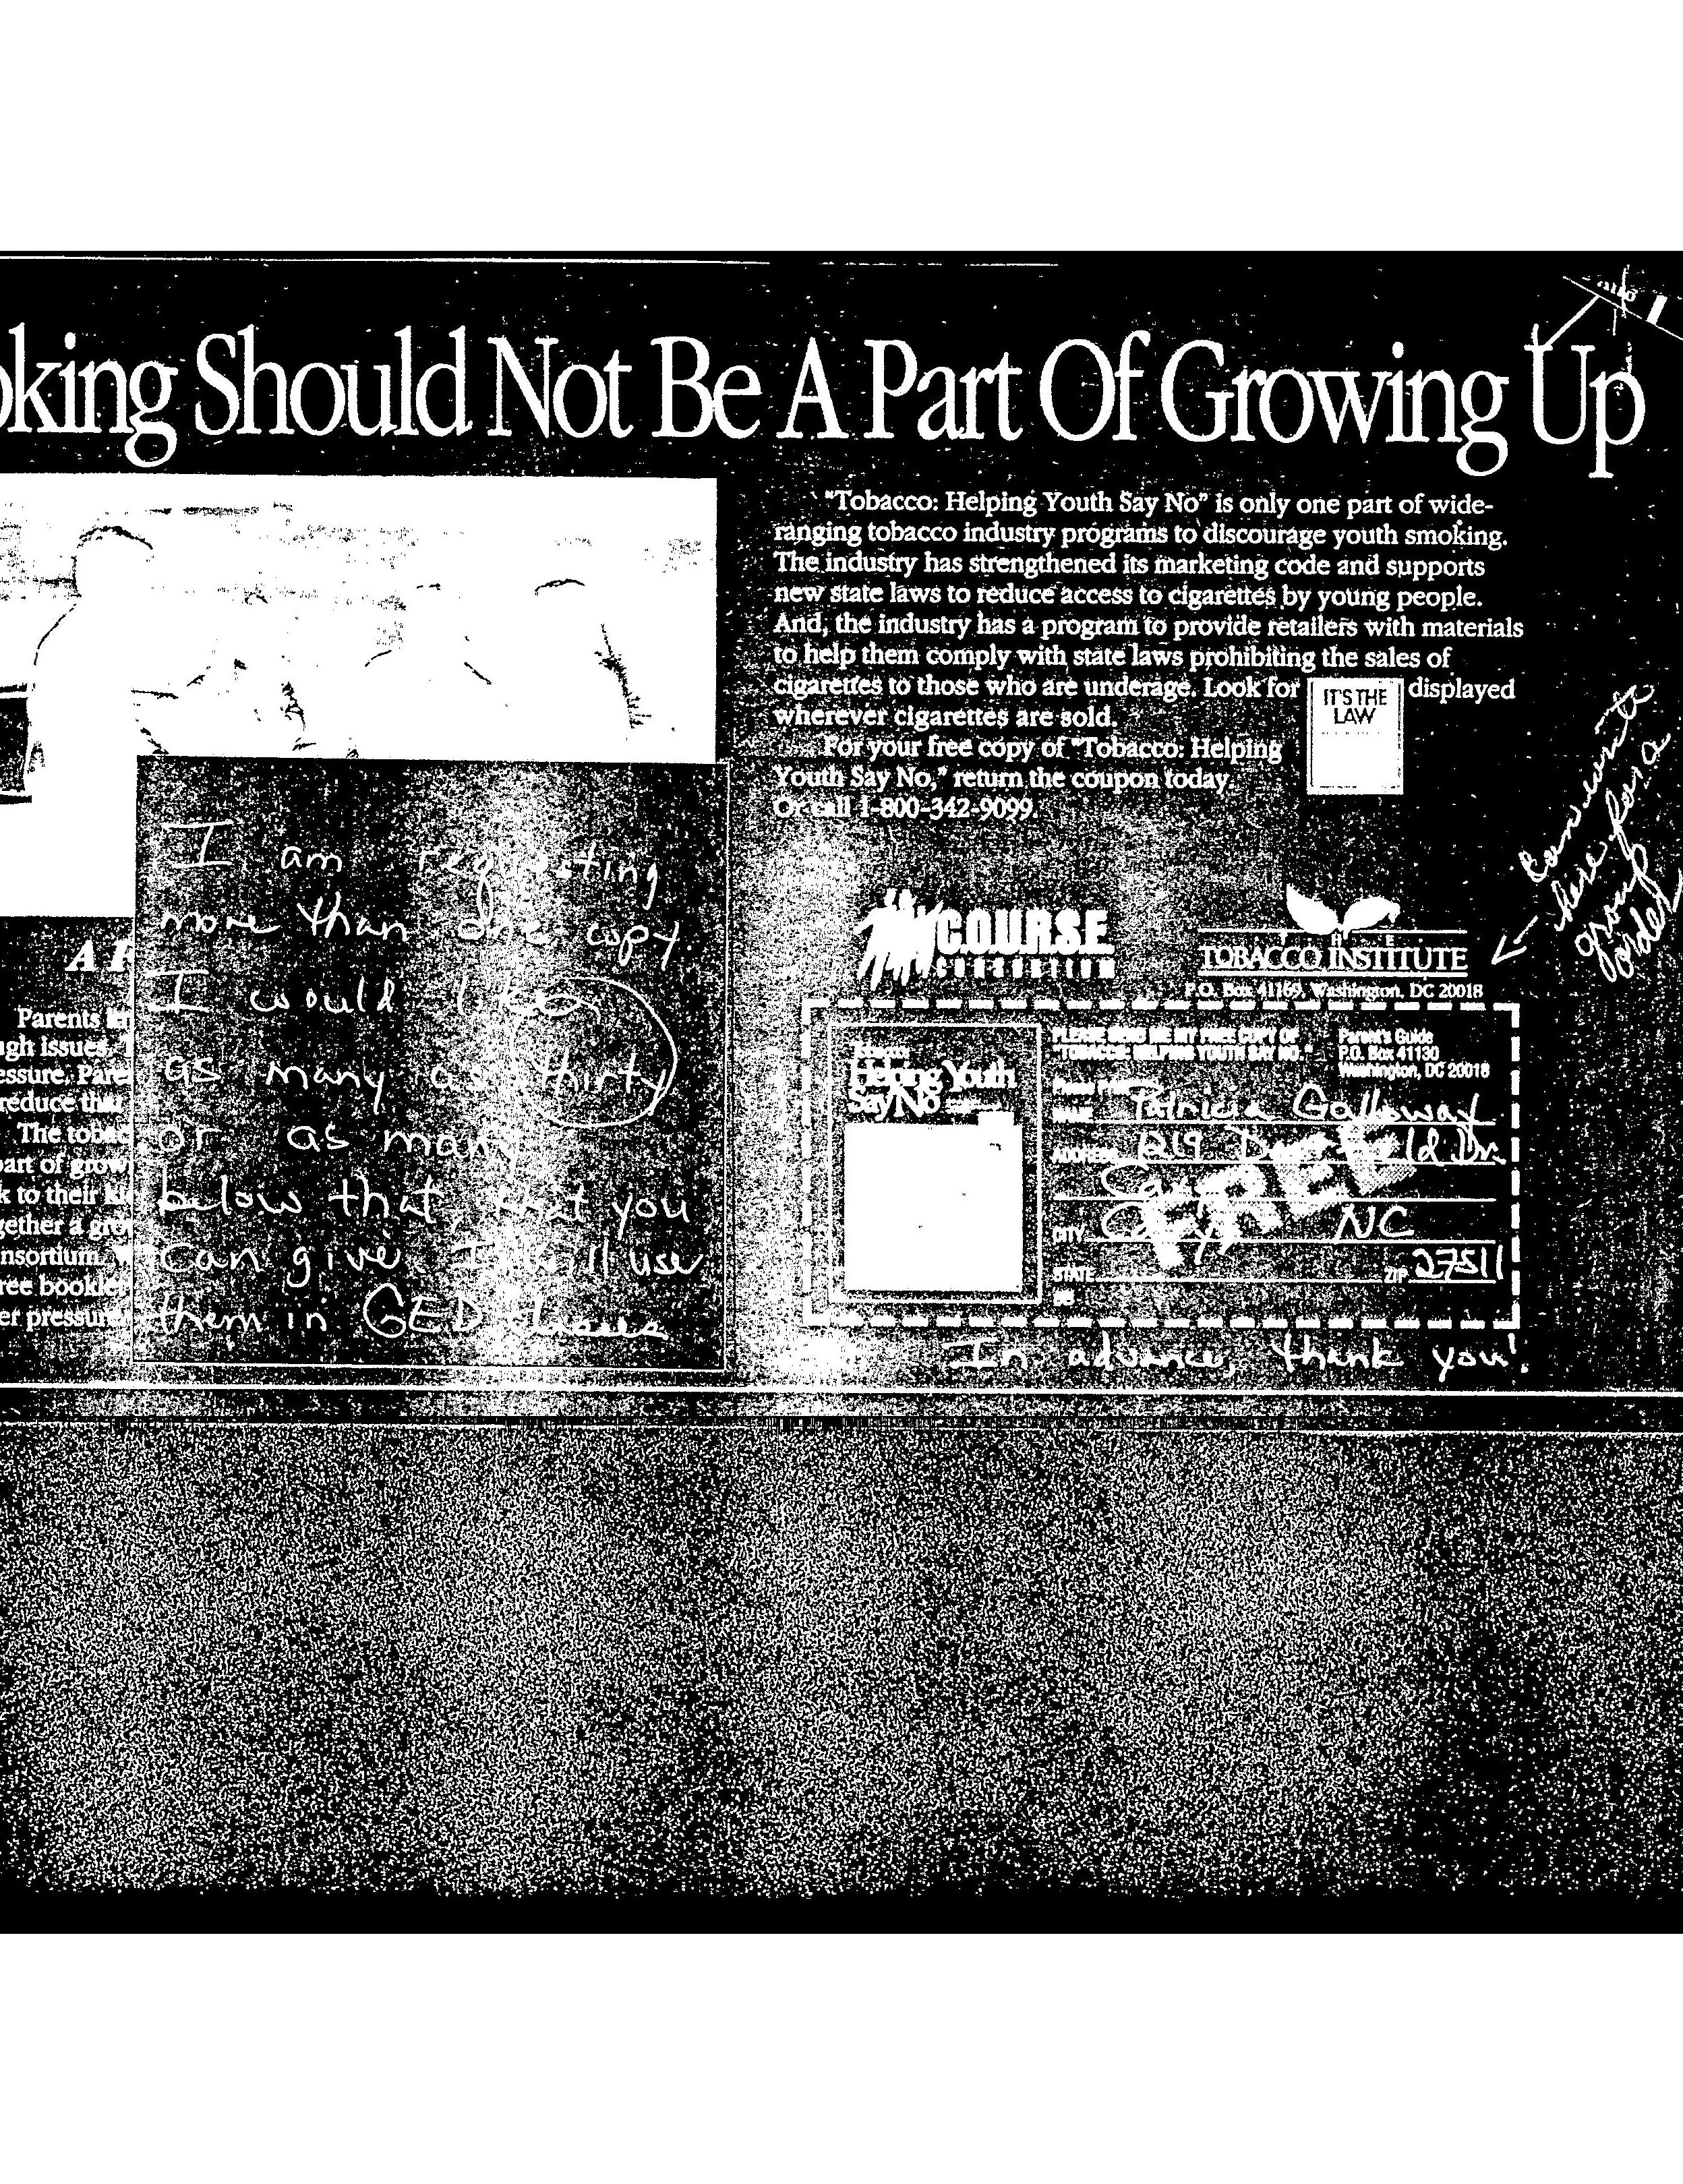

In [146]:

from PIL import ImageOps

ImageOps.invert(testtest)


In [147]:
EXIF_ORIENTATION = 0x0112

code = testtest.getexif().get(EXIF_ORIENTATION, 1)


In [148]:
import cv2

In [180]:
from PIL import ImageOps

fileName = 'data/Tobacco/ADVE/tob01701.23.jpg'

testtest = Image.open(fileName).convert('RGB')
d = cv2.imread(fileName)

rotation = 90
image1 = Image.open(fileName).transpose(Image.ROTATE_90)
image0 = Image.open(fileName).rotate(90)


In [181]:
print(d.shape)
print(testtest.size)

(3239, 2496, 3)
(2496, 3239)


In [182]:
image1.size

(3239, 2496)

In [183]:
image0.size

(2496, 3239)

In [184]:
image1.save('data/Tobacco/ADVE/tob01701.23.1.jpg')

In [185]:
fileName = 'data/Tobacco/ADVE/tob01701.23.1.jpg'

testtest1 = Image.open(fileName).convert('RGB')
print(testtest1.size)

(3239, 2496)


In [186]:
fileName = 'data/Tobacco/ADVE/tob01701.23.jpg'

testtest1 = Image.open(fileName).convert('RGB')
print(testtest1.size)

(2496, 3239)


In [143]:
Image.__version__

'8.3.1'

In [ ]:
EXIF_ORIENTATION = 0x0112
ROTATION = {3: Image.ROTATE_180, 6: Image.ROTATE_270, 8: Image.ROTATE_90}


def convert(input_filename, output_filename, image_format="PNG"):
    img = Image.open(input_filename)
    exif = img._getexif()
    if exif is not None:
        if EXIF_ORIENTATION in exif.keys():
            code = exif[EXIF_ORIENTATION]
            angle = ROTATION.get(code, None)
            print(f"filename: {input_filename};  EXIF rotation code: {code}")
            if angle is not None:
                img = img.transpose(angle)
    img.save(output_filename, format=image_format)


In [117]:
testtest.getexif().get()

<bound method Image.getexif of <PIL.Image.Image image mode=RGB size=1728x2292 at 0x7FCBB1520190>>

In [128]:
testtest = Image.open('data/Tobacco/ADVE/2071465080_5081.jpg').convert('RGB')



In [127]:
def convert(input_filename, output_filename, image_format="PNG"):
    img = Image.open(input_filename)
    code = img.getexif().get(EXIF_ORIENTATION, 1)
    print(f"filename: {input_filename};  EXIF rotation code: {code}")
    if code and code != 1:
        img = ImageOps.exif_transpose(img)
    img.save(output_filename, format=image_format)

In [102]:
testtest.exif_transpose

AttributeError: exif_transpose

In [86]:
from PIL.ExifTags import TAGS

In [87]:
testtest.TAGS

AttributeError: TAGS

In [73]:
pix = np.array(testtest)
pix.shape

(1575, 1200, 3)

In [64]:
if angle is not None:
                img = img.transpose(angle)
		del img.info["exif"]

In [66]:
Image.rotation(90)testtest1.rotation(90)

AttributeError: rotation

In [ ]:
for file_name in file_names:
    result = reader.readtext(file_name)
    write_file_name = file_name.split('.')[0] + '.txt'
    textfile = open(write_file_name, "w")
    for word in result:
        if word[2] > 0.6:
            textfile.write(word[1] + "\n")
    textfile.close()
            
    

In [ ]:
result[0][1] # words
result[0][2] # confidence


In [ ]:
len(result)

In [ ]:
text = []
for word in result:
    if word[2] > 0.6:
        text.append(word[1])

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
# Create a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)

# Construction 2
from spacy.lang.en import English
nlp = English()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer = nlp.tokenizer

In [ ]:
import multiprocessing
num_cpu_use = multiprocessing.cpu_count() - 1

In [ ]:
# load a pre-compiled list of stopwords
from spacy.lang.en.stop_words import STOP_WORDS
import spacy 
nlp = spacy.load("en_core_web_sm")

corpus = []

#for doc in nlp.pipe(texts, disable=["tok2vec", "ner"], n_process=num_cpu_use, batch_size=num_cpu_use * 32):
for doc in nlp.pipe(text, n_process=num_cpu_use, batch_size=num_cpu_use * 32):
    
    sentence = ''
    
    for token in doc:
        word = token.text.lower()
        # make sure we get rid of stopwords, punctuation, or numbers
        if word not in STOP_WORDS and not token.is_punct and not token.like_num:
            sentence = sentence + token.lemma_ + ' '
            
    corpus.append(sentence)

In [ ]:
corpus

In [ ]:
from transformers import BertTokenizer


In [20]:
bert_model_name = 'distilbert-base-uncased' 
##YOUR CODE HERE##

# If I use AutoModel class I get an error message that's related to having multiple cuda versions installed in
# my system. So I'm just initializing distilBert
from transformers import DistilBertModel, DistilBertTokenizer
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

2022-05-10 20:32:51.179216: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.1/lib64:
2022-05-10 20:32:51.179242: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializi

In [43]:
encoding = tokenizer.encode(content)

print(content)
print(encoding)

print(tokenizer.convert_ids_to_tokens(encoding))

['j', 'mnthol', 'and', 'lights', 'menthol', 'that', 'cigarette', 'smoking', 'is', 'dangerous', 'to', 'your', 'health', '9', 'mg', '2058501023', 'slims', '']
[101, 1046, 100, 1998, 4597, 100, 2008, 9907, 9422, 2003, 4795, 2000, 2115, 2740, 1023, 11460, 100, 100, 100, 102]
['[CLS]', 'j', '[UNK]', 'and', 'lights', '[UNK]', 'that', 'cigarette', 'smoking', 'is', 'dangerous', 'to', 'your', 'health', '9', 'mg', '[UNK]', '[UNK]', '[UNK]', '[SEP]']


In [44]:
print(len(content))
tokenizer(content)

18


{'input_ids': [[101, 1046, 102], [101, 24098, 2705, 4747, 102], [101, 1998, 102], [101, 4597, 102], [101, 2273, 2705, 4747, 102], [101, 2008, 102], [101, 9907, 102], [101, 9422, 102], [101, 2003, 102], [101, 4795, 102], [101, 2000, 102], [101, 2115, 102], [101, 2740, 102], [101, 1023, 102], [101, 11460, 102], [101, 16327, 27531, 24096, 2692, 21926, 102], [101, 11754, 2015, 102], [101, 102]], 'attention_mask': [[1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1], [1, 1]]}

In [61]:
import torch.nn as nn

class TweetClassifier(nn.Module):
    def __init__(self,
                 bert_encoder: nn.Module,
                 enc_hid_dim=768, #default embedding size
                 outputs=2,
                 dropout=0.1):
        super().__init__()

        self.bert_encoder = bert_encoder

        self.enc_hid_dim = enc_hid_dim
        
        
        ### YOUR CODE HERE ### 
        ...
        
        self.dropout = nn.Dropout(dropout)
        self.classification_head = nn.Linear(enc_hid_dim, outputs)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self,
                src,
                mask):
        bert_output = self.bert_encoder(src, mask)

        ### YOUR CODE HERE ###
        ...
        
        #print("bert_output.shape")
        #print(bert_output.shape)
        
        last_hidden_states = bert_output.last_hidden_state
        print("last_hidden_states.shape")
        print(last_hidden_states.shape)
        
        print('bert_output.pooler_output')
        print(bert_output.pooler_output)
        
        # last_hidden_states has shape (B X Length X hidden_dim)
        dropoutted = self.dropout(last_hidden_states[:, 0, :])
        classified = self.classification_head(dropoutted)
        softmaxed = self.softmax(classified)
        
        return softmaxed


In [62]:
def init_weights(m: nn.Module, hidden_size=768):
    k = 1/hidden_size
    for name, param in m.named_parameters():
        if 'weight' in name:
            print(name)
            nn.init.uniform_(param.data, a=-1*k**0.5, b=k**0.5)
        else:
            print(name)
            nn.init.uniform_(param.data, 0)

In [63]:
def init_classification_head_weights(m: nn.Module, hidden_size=768):
    ### YOUR CODE STARTS HERE ###
    ...
    k = 1/hidden_size
    for name, param in m.named_parameters():
        if 'classification_head' in name: # we want to init weights associated with classification_head
            #print(name)
            if 'weight' in name:
                print(name)
                nn.init.uniform_(param.data, a=-1*k**0.5, b=k**0.5)
            else:
                print(name)
                nn.init.uniform_(param.data, 0)

In [64]:
import torch

#define models, move to device, and initialize weights
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TweetClassifier(bert_model).to(device)
model.apply(init_classification_head_weights)
model.to(device)
print('Model Initialized')

classification_head.weight
classification_head.bias
Model Initialized


In [65]:
a = [1,2,3,4]

In [66]:
a[1:5000]

[2, 3, 4]

In [69]:
tokenizer.max_len_single_sentence

510

In [1]:
from imagefolder import get_folders, get_images

folder_names = get_folders('data/Tobacco')
folder_names = folder_names[1:]


In [2]:
from imagefolder import get_folders, get_images
from util import train_valid_test_split, combine_lists

folder_names = get_folders('data/Tobacco')
folder_names = folder_names[1:]

class_names = {}

for index, i in enumerate(folder_names):
    class_name = i.split('/')[-1]
    class_names.update({class_name:index})

# get the file names
file_names = get_images('data/Tobacco')
# the first list in the list is always empty.
file_names = file_names[1:]

# get the list of files which gets pre-split
train_list, valid_list, test_list = train_valid_test_split(file_names)

train_list = combine_lists(train_list)
valid_list = combine_lists(valid_list)
test_list = combine_lists(test_list)


/home/youngwook/Downloads/MultiModalDocument/util.py:48: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  train_list.append(temp_file_arrays[[X_train]])
/home/youngwook/Downloads/MultiModalDocument/util.py:49: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  valid_list.append(temp_file_arrays[[X_valid]])
/home/youngwook/Downloads/MultiModalDocument/util.py:50: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array inde

In [3]:
import pandas as pd
data = pd.DataFrame(train_list, columns=['image_path'])

In [4]:
data['label'] = data.image_path.str.split('/', expand=True)[2]

In [5]:
data.head()

image_path label
0             data/Tobacco/ADVE/2058501023.jpg  ADVE
1              data/Tobacco/ADVE/502596443.jpg  ADVE
2  data/Tobacco/ADVE/2067540350_2067540352.jpg  ADVE
3             data/Tobacco/ADVE/0030048095.jpg  ADVE
4              data/Tobacco/ADVE/507806606.jpg  ADVE

In [6]:
from datasets import Dataset 

# read dataframe as HuggingFace Datasets object
dataset = Dataset.from_pandas(data)

2022-05-12 20:12:37.908857: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda-11.1/lib64:
2022-05-12 20:12:37.908886: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
dataset

Dataset({
    features: ['image_path', 'label'],
    num_rows: 2433
})

In [8]:
from transformers import LayoutLMv2Processor


In [9]:
processor = LayoutLMv2Processor.from_pretrained("microsoft/layoutlmv2-base-uncased", revision="no_ocr")


In [11]:
def load_bbox(file_name):

    temp_name_ocr = file_name.split('.')[0] + '_ocr' + '.txt'
    ocr_list = []

    with open(temp_name_ocr) as ocr:

        while True:
            temp_list = []
            line_ocr = ocr.readline()

            if not line_ocr:
                break

            temp = line_ocr.replace('[', '').replace(']','')
            temp = temp.split(',')

            if len(temp) == 4:
                for number in temp:
                    temp_list.append(int(number))
                ocr_list.append(temp_list)

        ocr.close()

    return ocr_list

def load_ocr_texts(file_name, bbox):

    temp_name_text = file_name.split('.')[0]  + '_text' + '.txt'

    content = []
    iterator = 0
    ocr_word_list = []

    with open(temp_name_text) as f:

        while True:

            line_text = f.readline()

            if not line_text:
                break

            split_line = line_text.split(' ')

            temp_ocr = bbox[iterator]

            for i in split_line:

                content.append(re.sub(r'\W+', '', i).lower())
                ocr_word_list.append(temp_ocr)

            iterator += 1

        f.close()

    return content, ocr_word_list

In [34]:
list(class_names.keys())

['ADVE',
 'Memo',
 'Report',
 'Email',
 'Note',
 'Form',
 'Scientific',
 'News',
 'Letter',
 'Resume']

In [17]:
label2id = class_names

        

In [18]:
from PIL import Image
import transformers
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D
import re


# we need to define custom features
features = Features({
    'image': Array3D(dtype="int64", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(class_names), names=class_names),
})

def preprocess_data(examples):
    # take a batch of images
    images = [Image.open(path).convert("RGB") for path in examples['image_path']]

    # get the ocr'ed text
    
    box_lists = []
    words_lists = []
    labels_list = []
    for file_name in examples['image_path']:
        bbox = load_bbox(file_name)
        words, boxes = load_ocr_texts(file_name, bbox)
        
        box_lists.append(boxes)
        words_lists.append(words)
        labels_list.append(file_name.split('/')[2])

    encoded_inputs = processor(images, words_lists, boxes=box_lists, padding="max_length", truncation=True)
  
    # add labels
    encoded_inputs["labels"] = [label2id[label] for label in examples["label"]]

    return encoded_inputs

encoded_dataset = dataset.map(preprocess_data, remove_columns=dataset.column_names, features=features, 
                              batched=True, batch_size=2)

  0%|          | 0/1217 [00:00<?, ?ba/s]

In [19]:

id2label = {}
for key, value in label2id.items():
   if value in id2label:
       id2label[value].append(key)
   else:
       id2label[value]=[key]

In [20]:
encoded_dataset.set_format(type="torch", device="cuda")


In [21]:

import torch

dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=4)
batch = next(iter(dataloader))


In [22]:

for k,v in batch.items():
  print(k, v.shape)


image torch.Size([4, 3, 224, 224])
input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4])


In [23]:

processor.tokenizer.decode(batch['input_ids'][0].tolist())


'[CLS] slims j mnthol and lights menthol that cigarette smoking is dangerous to your health 9 mg 2058501023 slims [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD

In [24]:

id2label[batch['labels'][0].item()]


['ADVE']

In [26]:

from transformers import LayoutLMv2ForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased", num_labels=len(class_names))
model = model.to(device)


Some weights of the model checkpoint at microsoft/layoutlmv2-base-uncased were not used when initializing LayoutLMv2ForSequenceClassification: ['layoutlmv2.visual.backbone.bottom_up.res4.7.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.18.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.8.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.0.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.13.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.17.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.1.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.4.conv3.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res5.2.conv2.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res3.2.conv1.norm.num_batches_tracked', 'layoutlmv2.visual.backbone.bottom_up.res4.5.conv2.norm.num_batches_track

Some weights of LayoutLMv2ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [27]:

from transformers import AdamW
from tqdm.notebook import tqdm

optimizer = AdamW(model.parameters(), lr=5e-5)

global_step = 0
num_train_epochs = 10
t_total = len(dataloader) * num_train_epochs # total number of training steps 

#put the model in training mode
model.train()
for epoch in range(num_train_epochs):
  print("Epoch:", epoch)
  running_loss = 0.0
  correct = 0
  for batch in tqdm(dataloader):
      # forward pass
      outputs = model(**batch)
      loss = outputs.loss

      running_loss += loss.item()
      predictions = outputs.logits.argmax(-1)
      correct += (predictions == batch['labels']).float().sum()

      # backward pass to get the gradients 
      loss.backward()

      # update
      optimizer.step()
      optimizer.zero_grad()
      global_step += 1
  
  print("Loss:", running_loss / batch["input_ids"].shape[0])
  accuracy = 100 * correct / len(data)
  print("Training accuracy:", accuracy.item())


Epoch: 0


/home/youngwook/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/609 [00:00<?, ?it/s]

/home/youngwook/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/home/youngwook/anaconda3/envs/torch_gpu/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ce

RuntimeError: cuDNN error: CUDNN_STATUS_INTERNAL_ERROR
You can try to repro this exception using the following code snippet. If that doesn't trigger the error, please include your original repro script when reporting this issue.

import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([4, 1024, 14, 14], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(1024, 1024, kernel_size=[3, 3], padding=[1, 1], stride=[1, 1], dilation=[1, 1], groups=32)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

ConvolutionParams 
    data_type = CUDNN_DATA_FLOAT
    padding = [1, 1, 0]
    stride = [1, 1, 0]
    dilation = [1, 1, 0]
    groups = 32
    deterministic = false
    allow_tf32 = true
input: TensorDescriptor 0x5594ce21fc20
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 1024, 14, 14, 
    strideA = 200704, 196, 14, 1, 
output: TensorDescriptor 0x5594ce465db0
    type = CUDNN_DATA_FLOAT
    nbDims = 4
    dimA = 4, 1024, 14, 14, 
    strideA = 200704, 196, 14, 1, 
weight: FilterDescriptor 0x5594ce0c2e20
    type = CUDNN_DATA_FLOAT
    tensor_format = CUDNN_TENSOR_NCHW
    nbDims = 4
    dimA = 1024, 32, 3, 3, 
Pointer addresses: 
    input: 0x7f347f570000
    output: 0x7f3464930000
    weight: 0x7f36f5200000
Forward algorithm: 1


In [29]:

CUDA_LAUNCH_BLOCKING=1
import torch
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.benchmark = True
torch.backends.cudnn.deterministic = False
torch.backends.cudnn.allow_tf32 = True
data = torch.randn([1, 3, 470, 446], dtype=torch.float, device='cuda', requires_grad=True)
net = torch.nn.Conv2d(3, 64, kernel_size=[7, 7], padding=[0, 0], stride=[1, 1], dilation=[1, 1], groups=1)
net = net.cuda().float()
out = net(data)
out.backward(torch.randn_like(out))
torch.cuda.synchronize()

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.